# PP2 - Parte 3

## Notebook do exercício prático 2, Parte 3

* **UEA - Universidade do Estado do Amazonas**
* **EST - Escola Superior de Tecnologia**
* **Matéria de Redes Neurais**
* **Professora Elloá Guedes**
* **Repositório:** https://github.com/levidasilvalima/RNA-PP2

### Autores
* Ian Gustavo Alves Pessoa Silva - 1715080288  
* William Azevedo da Silva - 1615080226  
* Daniel Akio Chen - 1715080253  
* Levi da Silva Lima - 1615080131  


## Import das bibliotecas
Aqui há apenas um simples import das bibliotecas a serem usadas

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from google.colab import drive  

## Montar o drive
Para caso use o Google Colab.  
Se não usar, comentar essa seção.  

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


## Import do arquivo a ser usado
Como o próprio nome diz, é import dos dados brutos a serem usados.  
O primeiro desses imports é para o local, o outro é para o Google Colab.
Comentar aquele que não está sendo usado


In [4]:
# dados_brutos = np.fromfile('./dataHoldout.txt')

dados_brutos = np.fromfile('/content/drive/My Drive/Colab Notebooks/dataHoldout.txt') 

print(dados_brutos)

[-0.29322959 -0.09065359  1.         ...  0.72930655  0.93224271
  0.        ]


## Organização dos dados
Como os dados estão em um vetor único gigante, devemos remoldá-lo para podermos manipulá-lo.  
Usando o *reshape* e o *transpose*, os dados foram reconstruídos para que o x, y e resultado caibam em vetores diferentes. 

Para a seleção aleatória dos dados, foi feito um vetor de idx (vetor_idx) no qual foi dado um shuffle aleatório, de tal forma que os 70% primeiros dados foram usados para treinamento, enquanto os 30% restante para teste. Isso resulta em 560 exemplo para treino e 240 para teste.

Aqui, temos:
* vetor1: Contém elementos X da tupla
* vetor2: Contém elementos Y da tupla
* vetor_resposta: Contém elementos *Resposta* da tupla
* vetor_idx: Contém os idx usados na separação dos dados para treino e teste
* idx70: Uma flag para mostrar onde está 70% do vetor
* x0: É um termo único adicionado, descrito no modelo de neurônio perceptron de Rosenblatt
* vetor1_teste: Contém elementos X da tupla, que serão usados para teste
* vetor2_teste: Contém elementos Y da tupla, que serão usados para teste
* vetor_resposta_teste: Contém elementos *Resposta* da tupla, que serão usados para teste

In [81]:
dados_consertados = dados_brutos.reshape((len(dados_brutos)//3,3))
dados = dados_consertados.transpose()

# Flag para mostrar onde está 70% do vetor, calculada usando regra de 3
idx70 = (len(dados[0]) * 70) // 100

# vetor de idx aleatório
vetor_idx = np.arange(10)
vetor_idx = np.arange(len(dados[0]))
np.random.shuffle(vetor_idx)
vetor_idx = np.split(vetor_idx, [idx70]) # vetor_idx[0] são os idx que serão usados no treinamento
                                       # vetor_idx[1] são os idx que serão usados na validação

# Iniciando os vetores de treinamento
vetor1 = np.array([])
vetor2 = np.array([])
vetor_resposta = np.array([])

for i in range(len(vetorIdx[0])):
  vetor1 = np.insert(vetor1, len(vetor1), dados[1][vetor_idx[0][i]])
  vetor2 = np.insert(vetor2, len(vetor2), dados[2][vetor_idx[0][i]])
  vetor_resposta = np.insert(vetor_resposta, len(vetor_resposta), dados[0][vetor_idx[0][i]])

# Iniciando os vetores de teste
vetor1_teste = np.array([])
vetor2_teste = np.array([])
vetor_resposta_teste = np.array([])
 
for i in range(len(vetor_idx[1])):
  vetor1_teste = np.insert(vetor1_teste, len(vetor1_teste), dados[1][vetor_idx[1][i]])
  vetor2_teste = np.insert(vetor2_teste, len(vetor2_teste), dados[2][vetor_idx[1][i]])
  vetor_resposta_teste = np.insert(vetor_resposta_teste, len(vetor_resposta_teste), dados[0][vetor_idx[1][i]])

print("Quantidade total de dado:", len(dados[0]))
print("Quantidade total de dado usado para treinamento:", len(vetor1))
print("Quantidade total de dado usado para teste:", len(vetor1_teste))

x0 = -1


Quantidade total de dado: 800
Quantidade total de dado usado para treinamento: 560
Quantidade total de dado usado para teste: 240


## Mostrando pontos usados no treinamento
Olhando para os pontos usados no treinamento, visualmente podemos verificar que não se trata de um problema linearmente separável.

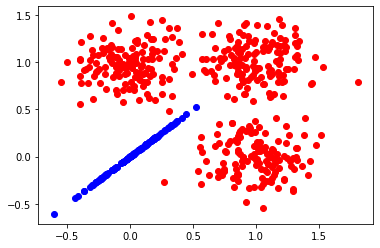

In [82]:
pontosAzul = [[], []]
pontosVermelho = [[], []]

for index in range (len(vetor_resposta)):
  if vetor_resposta[index] == 0:
    pontosVermelho[0].append(vetor1[index])
    pontosVermelho[1].append(vetor2[index])
  else:
    pontosAzul[0].append(vetor1[index])
    pontosAzul[1].append(vetor1[index])

plt.scatter(pontosVermelho[0], pontosVermelho[1], c="red", label = "Valores 0(Red)")
plt.scatter(pontosAzul[0], pontosAzul[1], c="blue", label = "Valores 1(Blue)")


## Inicialização dos pesos aleatórios
Aqui, para fazer uma simulação boa e demonstrar que podemos chegar ao resultado final de qualquer forma, geramos 3 pesos aleatórios.  
Os pesos foram gerados no intervalo **{-0.5, 0.5}**

In [83]:
pesos = np.random.uniform(-0.5, 0.5, 3)

for i in range (len(pesos)):
  pesos[i] = round(pesos[i], 4)

print("Pesos iniciais: ", pesos)

Pesos iniciais:  [0.2275 0.0299 0.1461]


## Função de ativação
Aqui temos a função de ativação que será usada para validar as respostas do aprendizado.  
A função usada foi a função de ativação degrau, com v = 0.  
Ou seja, quando a entrada é 0 ou maior, é 1, caso contrário é 0.

In [84]:
#Função de ativação tipo degrau, com v = 0
def funcao_ativacao(saida):
  if saida >= 0:
    return 1
  else:
    return 0
        

## Principal - Aprendizado
Aqui temos a parte principal desta parte 1, o código de aprendizagem dos pesos.  
O código irá ser executado e verificará a função de ativação e a resposta final, ajustando os pesos quando necessário.  
Além disso, o código irá contar quantas vezes os pesos foram ajustados e o número total de épocas.  
No final, ele irá *imprimir* os **ajustes feitos**, o **número de épocas** e o **número de ajustes feitos**.
  
Nós temos:  
* n: A taxa de Aprendizado.  
* epoca: Um ciclo de aprendizagem, um ciclo acaba quando todos os pesos visitados 1 vez(modificado ou não).  
* mudanca_peso: Quantas vezes o peso foi ajustado em uma época.  
* mudanca_total: Quantas vezes, ao total, o peso foi ajustado.  

Para parar, o código verificará todo final de época se houve convergência.  
Para convergir, o vetor das funções de ativação deve ser igual ao vetor resultado

In [87]:
#Temporários
res_temp = 0                    # Int temporário que vai guardar o res para funcao de ativacao
vetor_final = np.empty(800)    # Vetor que será comparado com o resultado
fa = 0                          # Funcao de ativacao

#Pontos de Interesse
n = 0.1             # Taxa de aprendizado
mudanca_peso = 0    # N de ajustes de peso
mudanca_total = 0   # N total de ajustes de peso
epoca = 0           # Epocas de ajuste

#Ele só para quando o vetor de respostas for igual ao vetor final
#while(True):
for i in range(100): 
  flag = False
  epoca += 1
  print("Época {}:".format(epoca))
  for i in range(idx70):
    vetor_res_temp = round((x0*pesos[0]) + (vetor1[i]*pesos[1]) + (vetor2[i]*pesos[2]), 4)
    fa = funcao_ativacao(vetor_res_temp)
    vetor_final[i] = fa

    if (fa != vetor_resposta[i]): #Se estiver errado
      #Erro é (esperado - funcao ativacao)
      erro = vetor_resposta[i] - fa

      valor_anterior = np.array([x0, vetor1[i], vetor2[i]])
      #Ajuste de peso
      pesos = pesos + (n*erro*valor_anterior)
      mudanca_peso += 1

      for elem in range (len(pesos)):
        pesos[elem] = round(pesos[elem], 4)


      #Print vetor de pesos, exerc 5
      print(" Novo vetor de pesos da epoca {}: {}".format(epoca, pesos))

  #Print dos pesos da época
  print(" Na época {} houve {} pesos mudados".format(epoca, mudanca_peso))
  mudanca_total += mudanca_peso
  mudanca_peso = 0

  #if((vetor_resposta == vetor_final).all()):
  #    break

print("\nFIM DO PROCESSAMENTO!")

Época 1:
 Novo vetor de pesos da epoca 1: [-0.2725 -0.507  -0.4794]
 Novo vetor de pesos da epoca 1: [-0.1725 -0.5894 -0.4474]
 Novo vetor de pesos da epoca 1: [-0.2725 -0.5538 -0.4379]
 Novo vetor de pesos da epoca 1: [-0.1725 -0.6079 -0.4225]
 Novo vetor de pesos da epoca 1: [-0.2725 -0.5779 -0.4076]
 Novo vetor de pesos da epoca 1: [-0.1725 -0.541  -0.4994]
 Novo vetor de pesos da epoca 1: [-0.0725 -0.5973 -0.4698]
 Novo vetor de pesos da epoca 1: [-0.1725 -0.584  -0.4508]
 Novo vetor de pesos da epoca 1: [-0.2725 -0.5668 -0.4253]
 Novo vetor de pesos da epoca 1: [-0.1725 -0.5394 -0.5145]
 Novo vetor de pesos da epoca 1: [-0.2725 -0.5191 -0.4949]
 Novo vetor de pesos da epoca 1: [-0.1725 -0.479  -0.5803]
 Novo vetor de pesos da epoca 1: [-0.2725 -0.4606 -0.5531]
 Novo vetor de pesos da epoca 1: [-0.1725 -0.4314 -0.6142]
 Novo vetor de pesos da epoca 1: [-0.2725 -0.4239 -0.5775]
 Novo vetor de pesos da epoca 1: [-0.1725 -0.5055 -0.5551]
 Novo vetor de pesos da epoca 1: [-0.2725 -0.48

## Cálculo da função da reta
Depois de se ter calculado os pesos e havido a convergência, nós podemos encontrar a curva que descreve a divisão dos pontos.  
  
A curva pode ser descrita como:  
  
$$y = \frac{w0}{w2} - \frac{w1}{w2}*x$$  
  
Onde:
* w0 é o peso de x0
* w1 é o peso de x
* w2 é o peso de y




In [88]:
funcao_a = round(pesos[0]/pesos[2], 4)
funcao_b = round(pesos[1]/pesos[2], 4)

x = np.arange(-1, 2)

y = funcao_a - funcao_b * x

print("Função: y = ( {} ) - ( {} )*x".format(funcao_a, funcao_b))


Função: y = ( 0.3515 ) - ( 1.0418 )*x


## Plot do gráfico e print dos ajustes e épocas totais
Finalmente, conseguido a função da reta, nós podemos plotar a reta junto com pontos descritos pelos dados.  
Assim, podemos visualizar se a reta corretamente dividiu os dados.  

Total de ajustes de peso:  3640
Total de épocas:  100


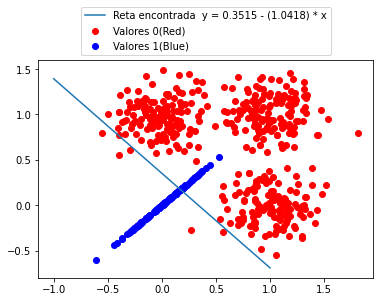

In [89]:
# cor = np.where(vetor_resposta == 0, "red", "blue")
#pontosAzul = np.zeros([2, len(vetor_resposta)])
#pontosVermelho = np.zeros([2, len(vetor_resposta)])

pontosAzul = [[], []]
pontosVermelho = [[], []]

for index in range (len(vetor_resposta)):
  if vetor_resposta[index] == 0:
    pontosVermelho[0].append(vetor1[index])
    pontosVermelho[1].append(vetor2[index])
  else:
    pontosAzul[0].append(vetor1[index])
    pontosAzul[1].append(vetor1[index])


print("Total de ajustes de peso: ", mudanca_total)
print("Total de épocas: ", epoca)

plt.scatter(pontosVermelho[0], pontosVermelho[1], c="red", label = "Valores 0(Red)")
plt.scatter(pontosAzul[0], pontosAzul[1], c="blue", label = "Valores 1(Blue)")
plt.plot(x, y, label = "Reta encontrada  y = {} - ({}) * x".format(funcao_a, funcao_b))
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.27))



## Resultados  

## Considerações finais
